<a href="https://colab.research.google.com/github/hany606/PMLDL_Fall21IU/blob/main/Optional/HanyHamed_PMLDL2021_HW_4_batch_optional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hany Hamed Solution

In [1]:
%matplotlib inline

PML&DL Homework (optional)
=============================
Based on the Tutorial: https://docs.dgl.ai/en/0.4.x/tutorials/basics/4_batch.html 

Instructions for the assignment are given in tags: [PMLDL] ... [/PMLDL]

Graph classification is an important problem
with applications across many fields, such as bioinformatics, chemoinformatics, social
network analysis, urban computing, and cybersecurity. Applying graph neural
networks to this problem has been a popular approach recently. This can be seen in the following reserach references: 
`Ying et al., 2018 <https://arxiv.org/abs/1806.08804>`_,
`Cangea et al., 2018 <https://arxiv.org/abs/1811.01287>`_,
`Knyazev et al., 2018 <https://arxiv.org/abs/1811.09595>`_,
`Bianchi et al., 2019 <https://arxiv.org/abs/1901.01343>`_,
`Liao et al., 2019 <https://arxiv.org/abs/1901.01484>`_,
`Gao et al., 2019 <https://openreview.net/forum?id=HJePRoAct7>`_).


Simple graph classification task
--------------------------------
In this tutorial, you learn how to perform batched graph classification
with DGL. The example task objective is to classify eight types of topologies shown here.

![](https://data.dgl.ai/tutorial/batch/dataset_overview.png)

    :align: center

Implement a synthetic dataset :class:`data.MiniGCDataset` in DGL. The dataset has eight 
different types of graphs and each class has the same number of graph samples.



In [2]:
pip install dgl-cu113 -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html


In [3]:
!pip install node2vec

In [4]:
import dgl
from dgl.data import MiniGCDataset
import numpy as np
import dgl.contrib.sampling.randomwalk
from node2vec import Node2Vec


# Sources to check: 
# https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
# http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
# https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb
# https://towardsdatascience.com/complete-guide-to-understanding-node2vec-algorithm-4e9a35e5d147
# https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html
# https://stellargraph.readthedocs.io/en/stable/demos/embeddings/node2vec-embeddings.html

'''
[PMLDL]
Check the MiniGCDataset source code and implement a class that generated a vector of features for each node (e.g. using node2vec).
So, result would be a YourNameItGCDataset class. 
[/PMLDL]
''' 

class HanyHamedGCDataset(MiniGCDataset):
    def __init__(self, *args, **kwargs):
        self.dimensions = kwargs.get("dimensions", 50) 
        self.walk_length = kwargs.get("walk_length", 16) 
        self.num_walks = kwargs.get("num_walks", 50)
        self.window = kwargs.get("window", 5)
        self.min_count = kwargs.get("min_count", 1)

        kwargs.pop("dimensions", None)
        kwargs.pop("walk_length", None)
        kwargs.pop("num_walks", None)
        kwargs.pop("min_count", None)
        kwargs.pop("window", None)

        super(HanyHamedGCDataset, self).__init__(*args, **kwargs)
        # self. walk_length -= 1

        self.gen_feature_vector(self.graphs, dimensions=self.dimensions, walk_length=self.walk_length, num_walks=self.num_walks, window=self.window, min_count=self.min_count)
        # self.edges_embs = HadamardEmbedder(keyed_vectors=self.model_features.wv)

    def gen_feature_vector(self, graphs, dimensions, walk_length, num_walks, window, min_count):
        # Compute the feature vector
        # Source: https://towardsdatascience.com/node2vec-embeddings-for-graph-data-32a866340fef
        self.features = []
        for g in graphs:
            g_networkx = g.to_networkx()
            node2vec = Node2Vec(g_networkx, dimensions=dimensions, walk_length=walk_length, num_walks=num_walks)
            model = node2vec.fit(window=window, min_count=min_count)
            self.features.append([model.wv[str(n)] for n in g_networkx.nodes])
        # Do node2vec using word2vec (Source: https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html) 
        # nodes = dgl.batch(g).nodes()
        # dgl.sampling.random_walk(g.nodes(), [0, 1, 2, 0], length=walk_length)
        # str_walks = [[str(n) for n in walk] for walk in walks]
        # from gensim.models import Word2Vec
        # model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

        return model


    def __getitem__(self, idx):
        # Source: https://github.com/eliorc/Medium/blob/master/Nod2Vec-FIFA17-Example.ipynb
        # model_features = self.gen_feature_vector(self.graphs[idx], dimensions=dimensions, walk_length=walk_length, num_walks=num_walks, window=window, min_count=min_count)
        # print(self.graphs[idx])
        # nodes = [x for x in model.wv.vocab if len(x) > 3 and x not in clubs]
        # embeddings = np.array(self.model_features.wv[self.graphs[idx].nodes()])
        # Source: https://github.com/eliorc/node2vec
        # self.edges_embs = HadamardEmbedder(keyed_vectors=self.model_features.wv)
        # print(edges_embs[('1', '2')])
        # print(self.graphs[idx].edges())
        # embeddings = self.edges_embs[self.graphs[idx].edges()]
        # embeddings = self.model_features.wv[self.graphs[idx].nodes()]
        # Method 1:
        embeddings = self.features[idx]
        # Method 2:
        # embeddings = dgl.sampling.node2vec_random_walk(self.graphs[idx], np.random.randint(len(self.graphs[idx].nodes()), size=len(self.graphs[idx].in_degrees())), 1, 1, walk_length=self.walk_length)
        # embeddings = dgl.sampling.node2vec_random_walk(self.graphs[idx], np.random.randint(len(self.graphs[idx].nodes()), size=self.num_walks), 1, 1, walk_length=self.walk_length)
        return self.graphs[idx], embeddings, self.labels[idx]


import matplotlib.pyplot as plt
import networkx as nx
# A dataset with 80 samples, each graph is
# of size [10, 20]
# dataset = MiniGCDataset(80, 10, 20)
# graph, label = dataset[0]

'''
[PMLDL]

Here YourNameItGCDataset dataset[0] should return a three elements: 
graph, node_features, label = dataset[0]
node_features stores all node features of the graph

[/PMLDL]
''' 
dataset = HanyHamedGCDataset(80, 10, 20)
graph, node_features, label = dataset[0]



Using backend: pytorch


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 109.04it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 163.94it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 125.14it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 139.00it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 101.31it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 94.52it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 128.97it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 117.68it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 138.30it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 123.88it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 99.11it/s] 


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 111.78it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 88.24it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 98.42it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 165.49it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 106.53it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 103.56it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 99.09it/s] 


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 101.33it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 155.42it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 116.19it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 93.53it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 98.95it/s] 


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 89.04it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 124.43it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 126.30it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 173.59it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 131.82it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 118.14it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 155.97it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 128.55it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 97.40it/s] 


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 136.28it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 132.67it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 101.99it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 161.74it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 92.65it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 126.06it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 133.57it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 141.92it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 196.79it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 203.63it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 203.43it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 199.46it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 102.85it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 109.35it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 192.03it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 198.24it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 198.02it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 107.51it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 78.59it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 166.08it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 111.09it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 118.45it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 162.35it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 201.78it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 133.27it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 107.49it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 167.29it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 136.71it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 129.21it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 130.12it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 120.98it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 125.30it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 96.86it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 121.99it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 125.59it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 102.97it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 105.67it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 115.33it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 164.77it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 165.31it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 117.68it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 92.61it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 142.47it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 162.69it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 112.11it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 157.12it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 169.55it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 141.04it/s]


Form a graph mini-batch
-----------------------
To train neural networks efficiently, a common practice is to batch
multiple samples together to form a mini-batch. Batching fixed-shaped tensor
inputs is common. For example, batching two images of size 28 x 28
gives a tensor of shape 2 x 28 x 28. By contrast, batching graph inputs
has two challenges:

* Graphs are sparse.
* Graphs can have various length. For example, number of nodes and edges.

To address this, DGL provides a :func:`dgl.batch` API. It leverages the idea that
a batch of graphs can be viewed as a large graph that has many disjointed 
connected components. Below is a visualization that gives the general idea.

![](https://data.dgl.ai/tutorial/batch/batch.png)

    :width: 400pt
    :align: center

Define the following ``collate`` function to form a mini-batch from a given
list of graph and label pairs.



In [5]:
import dgl
import torch

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

'''
[PMLDL]

Here you need to implement a new version of the collate(...) function.
New version should collate (stack) the graph, features and labels in a mini-batch.

[/PMLDL]
''' 

def new_collate(samples):
    graphs, node_features, labels = map(list, zip(*samples))
    node_features = torch.cat([torch.Tensor(nf) for nf in node_features])
    batched_graph = dgl.batch(graphs)
    return batched_graph, node_features, torch.tensor(labels)

The return type of :func:`dgl.batch` is still a graph. In the same way, 
a batch of tensors is still a tensor. This means that any code that works
for one graph immediately works for a batch of graphs. More importantly,
because DGL processes messages on all nodes and edges in parallel, this greatly
improves efficiency.

Graph classifier
----------------
Graph classification proceeds as follows.

![](https://data.dgl.ai/tutorial/batch/graph_classifier.png)


From a batch of graphs, perform message passing and graph convolution
for nodes to communicate with others. After message passing, compute a
tensor for graph representation from node (and edge) attributes. This step might 
be called readout or aggregation. Finally, the graph 
representations are fed into a classifier $g$ to predict the graph labels.

Graph convolution layer can be found in the ``dgl.nn.<backend>`` submodule.



In [6]:
from dgl.nn.pytorch import GraphConv

Readout and classification
--------------------------
For this demonstration, consider initial node features to be their degrees.
After two rounds of graph convolution, perform a graph readout by averaging
over all node features for each graph in the batch.

\begin{align}h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}\end{align}

In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
graphs with variable size. You then feed the graph representations into a
classifier with one linear layer to obtain pre-softmax logits.



In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        self.conv1 = GraphConv(in_dim, hidden_dim)#, norm="none")
        self.conv2 = GraphConv(hidden_dim, hidden_dim)
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g, features):
        '''
        [PMLDL]
        This call: h = g.in_degrees().view(-1, 1).float()
        feeds nodes degees list into input of the GCN (so, in_dim == 1).

        Here you need to change the code to feed features of nodes into input layer.
        Thus, in_dim will be the dimension of a feature-vector (say, 50). 
        In the lecture slides such vector for a node v was called x_v

        [/PMLDL]
        ''' 
        # This works somehow for having GraphConv
        # But the in_dim should be 1 not 50
        h = features.float()
        # Perform graph convolution and activation function.
        h = F.relu(self.conv1(g, h))
        h = F.relu(self.conv2(g, h))
        g.ndata['h'] = h
        # Calculate graph representation by averaging all the node representations.
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)


Setup and training
------------------
Create a synthetic dataset of $400$ graphs with $10$ ~
$20$ nodes. $320$ graphs constitute a training set and
$80$ graphs constitute a test set.



In [8]:
# Create training and test sets.
'''
[PMLDL]

Here calls to the YourNameItGCDataset class

[/PMLDL]
''' 
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)

trainset = HanyHamedGCDataset(320, 10, 20, walk_length=50)
testset = HanyHamedGCDataset(80, 10, 20, walk_length=50)

Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.52it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 56.36it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.62it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.99it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.81it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.06it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.20it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.14it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 47.62it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.89it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.27it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.31it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.16it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.47it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.76it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.62it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.61it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.30it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.03it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.28it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.16it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.17it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.21it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.72it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.19it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.66it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 56.78it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.36it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.99it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.60it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.03it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.33it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.11it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.38it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.20it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.98it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.86it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.70it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 56.43it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.86it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.88it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.81it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 55.50it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.41it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.85it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.64it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 47.33it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.89it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 46.73it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.75it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 55.65it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.52it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.61it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.30it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.19it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.42it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.07it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.83it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.85it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.53it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.97it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.85it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.31it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.66it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.35it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.98it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.11it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.74it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.91it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.54it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.87it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.32it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.22it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.78it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.95it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.77it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.97it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.13it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.84it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.16it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.92it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.44it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.25it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.23it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.90it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.09it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.14it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.53it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 53.03it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 47.64it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.67it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.83it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.31it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.61it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.18it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.92it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.36it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.13it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.47it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 46.10it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.35it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.63it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.74it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.65it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.02it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.99it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.16it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.08it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.90it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.80it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.10it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.82it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.63it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.94it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.19it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.50it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.21it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.18it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.56it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.62it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.59it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.87it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.68it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.15it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.80it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 54.39it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.49it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.25it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.25it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.14it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.07it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.47it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.99it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 52.84it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.47it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.04it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.78it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.94it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 53.06it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.22it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.14it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.59it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.37it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.78it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.06it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 53.93it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.64it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.36it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 46.87it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 52.99it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.51it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.12it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.86it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.94it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.47it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.37it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.13it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.65it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.35it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.98it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 66.25it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.98it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.70it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.36it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.19it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 67.61it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.56it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 63.48it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.82it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 66.13it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.11it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 66.54it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.94it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.87it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 63.14it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.02it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.32it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 64.22it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 61.86it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 62.29it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.22it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 66.47it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 64.52it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.62it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.06it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.62it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.56it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.36it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 64.25it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.12it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.80it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.02it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.06it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.90it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.64it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 63.39it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 63.04it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 61.94it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.19it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 61.45it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.40it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.35it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.73it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.50it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.18it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 58.36it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.64it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.06it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.43it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.11it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.27it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.90it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 58.54it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.05it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 44.06it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.31it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.63it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.53it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.26it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.06it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.09it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.25it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.16it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.31it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 58.67it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 56.71it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 65.06it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 62.04it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.90it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.87it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.99it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.97it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.23it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.20it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.44it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 52.17it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.10it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.59it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 63.26it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.50it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.74it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.38it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.83it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.80it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.50it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.05it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.85it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.57it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.95it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 53.02it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.74it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.30it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.67it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.56it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.93it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.10it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.03it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.43it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 27.31it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.29it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.81it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.14it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.13it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.34it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.61it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.61it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.20it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 47.14it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.62it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.82it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.48it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.92it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.11it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 46.29it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 26.85it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 27.23it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.16it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.64it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.59it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.87it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.91it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.34it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.96it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.22it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.10it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.81it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.70it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.17it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 43.20it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.18it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.97it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.89it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.24it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.74it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.56it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.56it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.02it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.73it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.19it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.97it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.67it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.91it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.81it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.03it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.55it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.91it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.74it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.13it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.86it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.19it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.01it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.90it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.59it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.15it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.49it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.62it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 33.00it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.46it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.67it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.83it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.44it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.98it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.15it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.00it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.44it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.02it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 40.24it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.78it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.80it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.80it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.80it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.53it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.21it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.12it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 46.24it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.78it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.79it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.18it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.51it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.56it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.59it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 27.26it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 28.87it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 27.06it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.47it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 38.95it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.96it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.58it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.66it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.99it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.92it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.37it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.28it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.25it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.89it/s]


Computing transition probabilities:   0%|          | 0/11 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 45.12it/s]


Computing transition probabilities:   0%|          | 0/19 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 27.39it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.06it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.36it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 41.44it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 59.98it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 60.84it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 61.51it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 62.23it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.83it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.50it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 59.52it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 62.08it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 58.87it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 32.72it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.10it/s]


Computing transition probabilities:   0%|          | 0/9 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 52.69it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.17it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.30it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.32it/s]


Computing transition probabilities:   0%|          | 0/8 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 60.70it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.65it/s]


Computing transition probabilities:   0%|          | 0/16 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 31.95it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 49.28it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.64it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.01it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.83it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.82it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.90it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.15it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 35.06it/s]


Computing transition probabilities:   0%|          | 0/13 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 39.71it/s]


Computing transition probabilities:   0%|          | 0/17 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 30.01it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.56it/s]


Computing transition probabilities:   0%|          | 0/15 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 34.03it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 51.23it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.12it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 36.17it/s]


Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 29.00it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.87it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 48.99it/s]


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 37.74it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.20it/s]


Computing transition probabilities:   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 50.62it/s]


Computing transition probabilities:   0%|          | 0/12 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:01<00:00, 42.35it/s]


In [12]:
import torch.optim as optim
from torch.utils.data import DataLoader


# Use PyTorch's DataLoader and the collate function
# defined before.
'''
[PMLDL]

Here pass new version of collate()

[/PMLDL]
''' 
# data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
#                          collate_fn=collate)

data_loader = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=new_collate)


# Create model
'''
[PMLDL]

Here pass new dimension of input (say, 50) as the first parameter.

[/PMLDL]
''' 

# model = Classifier(1, 256, trainset.num_classes)
model = Classifier(50, 256, trainset.num_classes)

loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
model.train()

epoch_losses = []
for epoch in range(80):
    epoch_loss = 0
    for iter, (bg, features, label) in enumerate(data_loader):
        # print(iter)
        prediction = model(bg, features)
        loss = loss_func(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
        # print('Epoch {}, loss {:.4f}'.format(iter, epoch_loss))
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 0, loss 2.0359
Epoch 1, loss 1.8264
Epoch 2, loss 1.4761
Epoch 3, loss 1.1628
Epoch 4, loss 0.9622
Epoch 5, loss 0.8345
Epoch 6, loss 0.7289
Epoch 7, loss 0.6582
Epoch 8, loss 0.6402
Epoch 9, loss 0.5939
Epoch 10, loss 0.5037
Epoch 11, loss 0.4490
Epoch 12, loss 0.4079
Epoch 13, loss 0.3609
Epoch 14, loss 0.3207
Epoch 15, loss 0.2786
Epoch 16, loss 0.2339
Epoch 17, loss 0.2118
Epoch 18, loss 0.1872
Epoch 19, loss 0.1666
Epoch 20, loss 0.1445
Epoch 21, loss 0.1221
Epoch 22, loss 0.1409
Epoch 23, loss 0.1119
Epoch 24, loss 0.0939
Epoch 25, loss 0.0781
Epoch 26, loss 0.0670
Epoch 27, loss 0.0629
Epoch 28, loss 0.0602
Epoch 29, loss 0.0454
Epoch 30, loss 0.0489
Epoch 31, loss 0.0379
Epoch 32, loss 0.0343
Epoch 33, loss 0.0282
Epoch 34, loss 0.0261
Epoch 35, loss 0.0235
Epoch 36, loss 0.0216
Epoch 37, loss 0.0188
Epoch 38, loss 0.0206
Epoch 39, loss 0.0227
Epoch 40, loss 0.0187
Epoch 41, loss 0.0174
Epoch 42, loss 0.0138
Epoch 43, loss 0.0128
Epoch 44, loss 0.0118
Epoch 45, loss 0.012

The learning curve of a run is presented below.



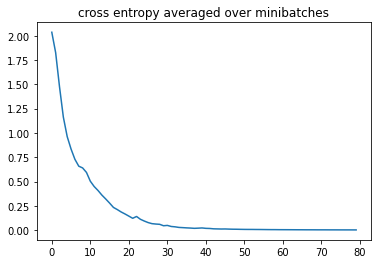

In [13]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

The trained model is evaluated on the test set created. To deploy
the tutorial, restrict the running time to get a higher
accuracy ($80$ % ~ $90$ %) than the ones printed below.



In [14]:
model.eval()
# Convert a list of tuples to two lists
'''
[PMLDL]

Slightly modify this code to evaluate results, as batch should contain three elements

[/PMLDL]
''' 
test_X, test_F, test_Y = map(list, zip(*testset))
test_bg = dgl.batch(test_X)
test_Y = torch.tensor(test_Y).float().view(-1, 1)
test_F = torch.cat([torch.Tensor(nf) for nf in test_F])
probs_Y = torch.softmax(model(test_bg, test_F), 1)
sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y.float()).sum().item() / len(test_Y) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_Y == argmax_Y.float()).sum().item() / len(test_Y) * 100))

Accuracy of sampled predictions on the test set: 81.2500%
Accuracy of argmax predictions on the test set: 80.000000%




What's next?
------------
Graph classification with graph neural networks is still a new field.
It's waiting for people to bring more exciting discoveries. The work requires 
mapping different graphs to different embeddings, while preserving
their structural similarity in the embedding space. To learn more about it, see 
`How Powerful Are Graph Neural Networks? <https://arxiv.org/abs/1810.00826>`_ a research paper  
published for the International Conference on Learning Representations 2019.

For more examples about batched graph processing, see the following:

* Tutorials for `Tree LSTM <https://docs.dgl.ai/tutorials/models/2_small_graph/3_tree-lstm.html>`_ and `Deep Generative Models of Graphs <https://docs.dgl.ai/tutorials/models/3_generative_model/5_dgmg.html>`_
* An example implementation of `Junction Tree VAE <https://github.com/dmlc/dgl/tree/master/examples/pytorch/jtnn>`_

